In [1]:
# ws09

import numpy as np

from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

n_samples = len(faces.images)  
X = faces.images
y = faces.target
X = X.reshape(n_samples, -1)
X.shape, y.shape

((400, 4096), (400,))

# No PCA

In [2]:
from sklearn.model_selection import cross_val_score
from time import time
from sklearn.svm import SVC

model = SVC(kernel='linear')

start = time()

model.fit(X, y)
print('{:.5f} sec' . format(time() - start))

cvs = cross_val_score(model, X, y, cv=10)  # no need to use model.fit

print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

0.24400 sec
cross val scores [1.   1.   1.   1.   1.   0.95 0.95 1.   0.95 0.95]
Average (%) = 98.00


In [3]:
from sklearn.decomposition import PCA
pca = PCA()
pca_num = PCA(.90)
pca_num.fit(X)
pca_num.n_components_

66

In [4]:
from time import time
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

n_comp = 66
pipe = Pipeline([
                 ('pca', PCA(n_components=n_comp, whiten=True)), 
                 ('linsvc', SVC(kernel='linear')) 
               ])

start = time()
pipe.fit(X, y)
print('{:.5f} sec' . format(time() - start))

cvs = cross_val_score(pipe, X, y, cv=10) 

print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

0.11201 sec
cross val scores [1.   1.   1.   1.   0.98 0.98 0.92 1.   0.95 1.  ]
Average (%) = 98.25


In [5]:
# ws 10
n_comp = 66
pca = PCA(n_components=n_comp)

PCAs = pca.fit_transform(faces.data)
reverse = pca.inverse_transform(PCAs)

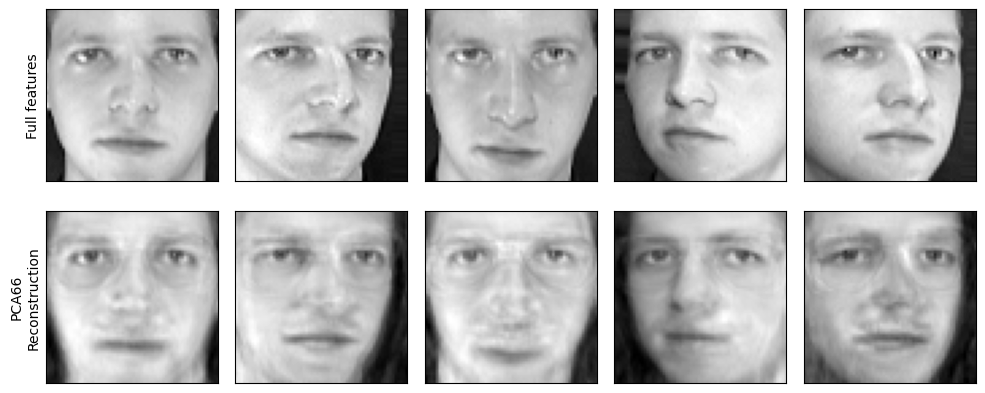

In [6]:
# Plot the results

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(12, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(faces.data[i].reshape(64, 64), cmap='binary_r')
    ax[1, i].imshow(reverse[i].reshape(64, 64), cmap='binary_r')
    
ax[0, 0].set_ylabel('Full features')
ax[1, 0].set_ylabel('PCA66\nReconstruction');
plt.show()

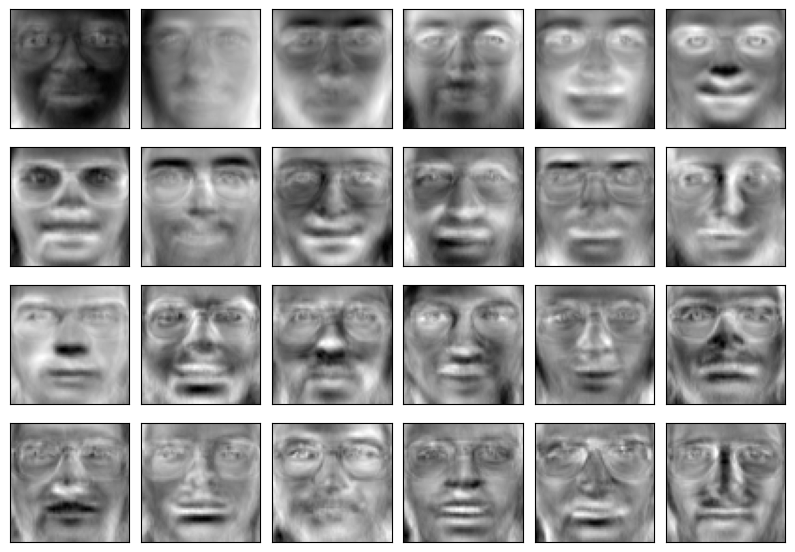

In [12]:
import matplotlib.pyplot as plt
n_comp = 60
pca = PCA(n_components=n_comp)
pca.fit_transform(faces.data)

fig, axes = plt.subplots(4, 6, figsize=(10, 7), # 10,5
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='binary')

plt.show()